In [4]:
import numpy as np
import pandas as pd
import pymc3 as pm
from scipy.stats import pearsonr, norm

import matplotlib.pyplot as plt
%matplotlib inline

In [809]:
### Load densities' dataset
densities = pd.read_pickle('/home/lorentz/Desktop/Datasets/D4R/densities_province_03_17.pkl')
densities.sort_values('refugees_03_17',ascending=False)

,calls_incoming_density_t,sms_incoming_density_t,calls_outgoing_density_t,sms_outgoing_density_t,calls_incoming_density_r,sms_incoming_density_r,calls_outgoing_density_r,sms_outgoing_density_r,area,refugees_03_17,pop_03_17,pop_density_r,pop_density_t
Istanbul,0.562824,0.643775,2.635413,3.704253,0.158914,0.062642,0.277788,0.224515,4756.951766,479555,14804116,100.811407,3112.101348
Sanliurfa,0.007297,0.012528,0.035691,0.061689,0.000903,0.002295,0.003222,0.003829,19622.648167,420532,1940627,21.430950,98.897304
Hatay,0.036182,0.058135,0.163265,0.253045,0.004182,0.003456,0.011845,0.012088,5735.730020,384024,1555165,66.952942,271.136367
Gaziantep,0.040445,0.092414,0.212449,0.341760,0.007429,0.004621,0.022764,0.016700,7151.379545,329670,1974244,46.098798,276.064777
Adana,0.015117,0.020563,0.076455,0.132897,0.003987,0.001879,0.005652,0.007165,15835.490832,150795,2201670,9.522597,139.033897
Mersin,0.010699,0.014265,0.065941,0.139079,0.007386,0.003474,0.009593,0.008187,15262.785453,146931,1773852,9.626749,116.220726
Kirsehir,0.001061,0.002265,0.012028,0.027027,0.000197,0.000000,0.001540,0.000269,6783.710939,124481,130825,18.349986,19.285167
Izmir,0.031594,0.017865,0.181360,0.311564,0.006824,0.003330,0.016225,0.020749,12368.828446,108889,4223545,8.803502,341.466859
Bursa,0.033555,0.035588,0.144389,0.228023,0.005613,0.001402,0.008972,0.006973,10863.302976,106893,2901396,9.839825,267.082305
Mardin,0.001423,0.000594,0.015870,0.036024,0.001350,0.002806,0.004694,0.010060,10539.199068,94346,796237,8.951914,75.550048


In [1012]:
# Introduce models for bayesian inference
def model_mcmc_normal(X,Y):
    ### Definition of the MonteCarloMarkovChain model that will be used to optimize the value of the parameters
    """
      Params:
          X = pd.Series containing the mobile phone calls
          Y = pd.Series containing the population data
      Returns:
          population_model = pymc3 MCMC model 
    """    
    with pm.Model() as population_model:
        # Priors for the unknown model parameters
        alpha = pm.Normal('alpha', mu=1428, sd=5)
        beta = pm.Normal('beta', mu=0.8, sd=0.1)
        sigma = pm.HalfNormal('sigma', sd=1)

        # Expected value of outcome
        mu = alpha*X**beta

        # Likelihood (sampling distribution) of observations
        Y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed=Y)
    
    return population_model


def model_mcmc_normal_refugees(X,Y):
    ### Definition of the MonteCarloMarkovChain model that will be used to optimize the value of the parameters
    """
      Params:
          X = pd.Series containing the mobile phone calls
          Y = pd.Series containing the population data
      Returns:
          population_model = pymc3 MCMC model 
    """    
    with pm.Model() as population_model:
        # Priors for the unknown model parameters
        alpha = pm.Normal('alpha', mu=279, sd=5)
        beta = pm.Normal('beta', mu=0.8, sd=.05)
        sigma = pm.HalfNormal('sigma', sd=1)

        # Expected value of outcome
        mu = alpha*X**beta

        # Likelihood (sampling distribution) of observations
        Y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed=Y)
    
    return population_model


def model_mcmc_student_T(X,Y):
    ### Definition of the MonteCarloMarkovChain model that will be used to optimize the value of the parameters
    """
      Params:
          X = pd.Series containing the mobile phone calls
          Y = pd.Series containing the population data
      Returns:
          population_model = pymc3 MCMC model 
    """
    with pm.Model() as population_model:
        # Priors for the unknown model parameters
        alpha = pm.Normal('alpha', mu=780, sd=5)
        beta = pm.Normal('beta', mu=0.6, sd=0.1)

        # Expected value of outcome
        mu = alpha*X**beta

        # Likelihood (sampling distribution) of observations
        Y_obs = pm.StudentT('Y_obs', nu=2, mu=mu, observed=Y)
    
    return population_model

def model_mcmc_student_T_refugees(X,Y):
    ### Definition of the MonteCarloMarkovChain model that will be used to optimize the value of the parameters
    """
      Params:
          X = pd.Series containing the mobile phone calls
          Y = pd.Series containing the population data
      Returns:
          population_model = pymc3 MCMC model 
    """
    with pm.Model() as population_model:
        # Priors for the unknown model parameters
        alpha = pm.Normal('alpha', mu=770, sd=5)
        beta = pm.Normal('beta', mu=0.16, sd=0.1)

        # Expected value of outcome
        mu = alpha*X**beta

        # Likelihood (sampling distribution) of observations
        Y_obs = pm.StudentT('Y_obs', nu=2, mu=mu, observed=Y)
    
    return population_model



In [784]:
# ----------------------------------------------------------------------------------------------------- #
# ------------------------------------- All-in model no test set -------------------------------------- #
# ----------------------------------------------------------------------------------------------------- #

In [785]:
# MCMC for the complete dataset
Normal = True
studentT = False

data_size = len(densities)
pop_col = 'pop_density_t'
phone_col = 'calls_outgoing_density_t'

### Shuffles the data
df_rand = densities.sample(data_size, axis=0)
df_rand = df_rand[df_rand[phone_col]!=0]
### Remove Istanbul
# df_rand = df_rand[df_rand[pop_col]<df_rand[pop_col].max()]

X_t = np.array(df_rand[phone_col])
Y_t = np.array(df_rand[pop_col])

# Initialize the baesyan model with the data
if Normal:
    int_model_t = model_mcmc_normal(X_t,Y_t)
elif studentT:
    int_model_t = model_mcmc_student_T(X_t,Y_t)

# Run the MCMC algorithm 
step = pm.NUTS(model=int_model_t)
trace_t = pm.sample(20000, model=int_model_t, step=step, tune=10000, njobs=4, chains=4)

# Estimates the Y_output of the model mediating over the chain values of the variables
Y_model_t = trace_t['alpha'].mean()*X_t**trace_t['beta'].mean()


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_log__, beta, alpha]
100%|██████████| 30000/30000 [00:32<00:00, 930.07it/s]


In [984]:
pearsonr(Y_model_t,Y_t)

(0.9951436354872103, 2.5827896011050456e-81)

In [1013]:
# MCMC for the complete dataset
Normal = True
studentT = False

pop_col = 'pop_density_r'
phone_col = 'calls_outgoing_density_r'

# Shuffles the data
df_rand = densities.copy()
df_rand = df_rand[df_rand[phone_col]!=0]
# Remove Istanbul
df_rand = df_rand[df_rand[pop_col]<df_rand[pop_col].max()]

data_size = len(df_rand)

X_r = np.array(df_rand[phone_col])
Y_r = np.array(df_rand[pop_col])

# Initialize the baesyan model with the data
if Normal:
    int_model_r = model_mcmc_normal_refugees(X_r,Y_r)
if studentT:
    int_model_r = model_mcmc_student_T_refugees(X_r,Y_r)
    
# Run the MCMC algorithm 
step = pm.NUTS(model=int_model_r)
trace_r = pm.sample(5000, model=int_model_r, step=step, tune=5000, njobs=4, chains=4)

# Estimates the Y_output of the model mediating over the chain values of the variables
Y_model_r = trace_r['alpha'].mean()*X_r**trace_r['beta'].mean()

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_log__, beta, alpha]
100%|██████████| 10000/10000 [00:10<00:00, 956.64it/s]


In [1014]:
pearsonr(Y_model_r,Y_r)

(0.392885254820663, 0.00034157164914382055)

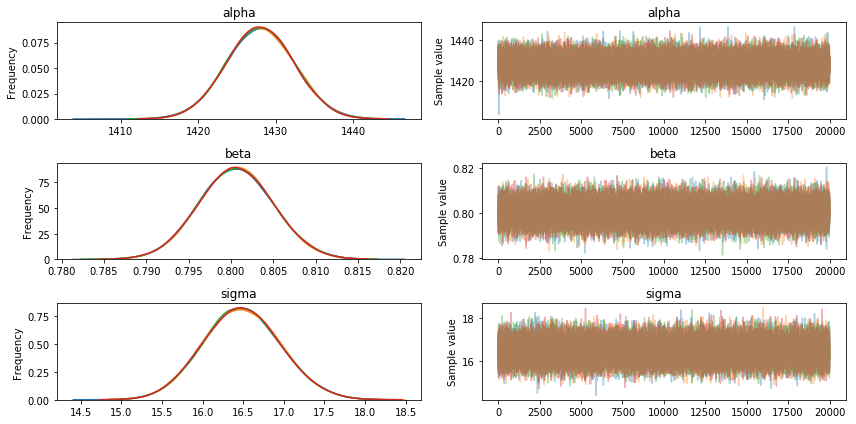

In [1015]:
# Check the chain's convergence and behaviour
pm.traceplot(trace_t);

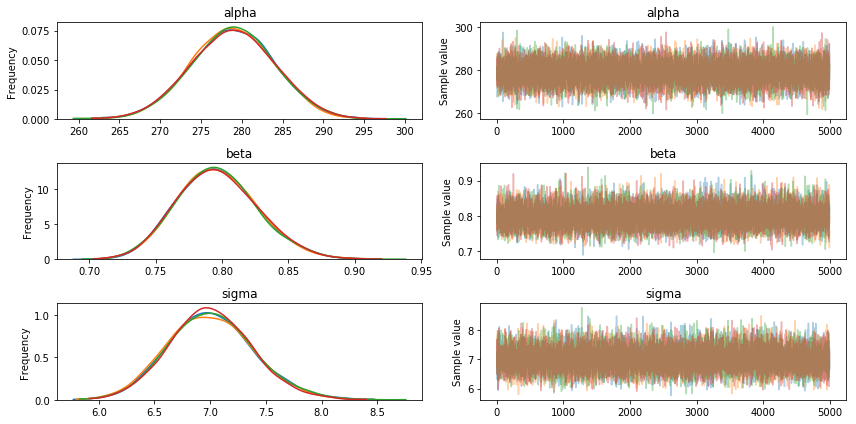

In [1016]:
# Check the chain's convergence and behaviour
pm.traceplot(trace_r);

In [1017]:
# High level statistics - model selection and explained variance
print(pm.stats.waic(trace=trace_t, model=int_model_t))
print(pm.stats.r2_score(np.log(Y_t),Y_model_t))

WAIC_r(WAIC=969.6996788390371, WAIC_se=94.57454774192719, p_WAIC=14.04451285793817, var_warn=1)
r2_r(r2_median=0.5, r2_mean=0.5, r2_std=0.0)


/home/lorentz/.virtualenvs/jupy_env/lib/python3.5/site-packages/pymc3/stats.py:211: UserWarning: For one or more samples the posterior variance of the
        log predictive densities exceeds 0.4. This could be indication of
        WAIC starting to fail see http://arxiv.org/abs/1507.04544 for details
        
  """)


In [1018]:
# High level statistics - model selection and explained variance
print(pm.stats.waic(trace=trace_r, model=int_model_r))
print(pm.stats.r2_score(np.log(Y_r),Y_model_r))

WAIC_r(WAIC=603.9332567548963, WAIC_se=93.02563884770431, p_WAIC=19.23516999633836, var_warn=1)
r2_r(r2_median=0.59, r2_mean=0.59, r2_std=0.0)


/home/lorentz/.virtualenvs/jupy_env/lib/python3.5/site-packages/pymc3/stats.py:211: UserWarning: For one or more samples the posterior variance of the
        log predictive densities exceeds 0.4. This could be indication of
        WAIC starting to fail see http://arxiv.org/abs/1507.04544 for details
        
  """)


In [1019]:
# Check the predicted the output of the model with the training set
# Turkish
tttp = pd.DataFrame({'train':Y_t,'model':Y_model_t})
tttp.sort_values('train',ascending=False).sum()

model    10150.682019
train    10546.486549
dtype: float64

In [1020]:
# Check the predicted the output of the model with the training set
# Refugees
tttp = pd.DataFrame({'train':Y_r,'model':Y_model_r})
tttp.sort_values('train',ascending=False).sum()

model    271.217826
train    272.446772
dtype: float64

In [1021]:
# Mean values for the Turkish parameters
alpha_t = round(trace_t['alpha'].mean(),3)
alpha_st_t = round(trace_t['alpha'].std(),3)
beta_t = round(trace_t['beta'].mean(),3)
beta_st_t = round(trace_t['beta'].std(),3)
sigma_t = round(trace_t['sigma'].mean(),3)
sigma_st_t = round(trace_t['sigma'].std(),3)
print(' {}+-{}\n {}+-{}\n {}+-{}'.format(alpha_t,alpha_st_t,beta_t,beta_st_t,sigma_t,sigma_st_t))
# print(' {}+-{}\n {}+-{}'.format(alpha_t,alpha_st_t,beta_t,beta_st_t))

 1427.93+-4.27
 0.801+-0.004
 16.478+-0.468


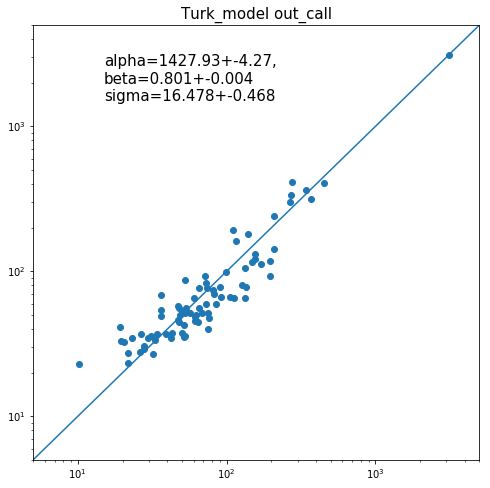

In [1022]:
# Scatter of the logged values of the provinces population density: real -xaxis; modeled-yaxis
fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.scatter(Y_t,Y_model_t)
ax.plot([5,10000],[5,10000])
plt.text(15, 1500., 'alpha={}+-{},\nbeta={}+-{}\nsigma={}+-{}'.format(alpha_t,alpha_st_t,beta_t,beta_st_t,sigma_t,sigma_st_t), fontsize=15)
# plt.text(15, 3000., 'alpha={}+-{},\nbeta={}+-{}'.format(alpha_t,alpha_st_t,beta_t,beta_st_t), fontsize=15)
plt.title('Turk_model out_call', fontsize=15);
plt.xlim(5,5000)
plt.ylim(5,5000)
ax.set_xscale('log')
ax.set_yscale('log')

In [1023]:
# Mean values for the Refugees parameters
alpha_r = round(trace_r['alpha'].mean(),3)
alpha_st_r = round(trace_r['alpha'].std(),3)
beta_r = round(trace_r['beta'].mean(),3)
beta_st_r = round(trace_r['beta'].std(),3)
sigma_r = round(trace_r['sigma'].mean(),3)
sigma_st_r = round(trace_r['sigma'].std(),3)
print(' {}+-{}\n {}+-{}\n {}+-{}'.format(alpha_r,alpha_st_r,beta_r,beta_st_r,sigma_r,sigma_st_r))
# print(' {}+-{}\n {}+-{}'.format(alpha_r,alpha_st_r,beta_r,beta_st_r))


 278.933+-5.022
 0.797+-0.03
 7.01+-0.376


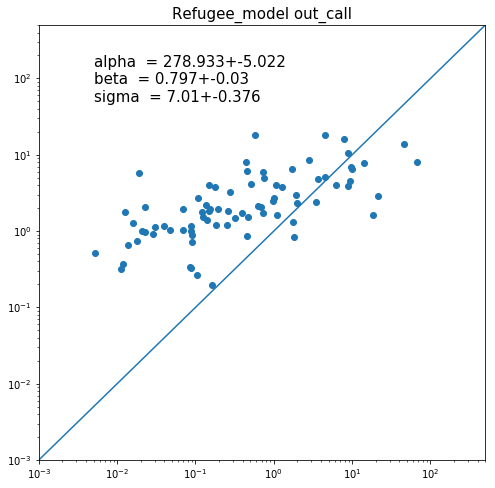

In [1024]:
# Scatter of the logged values of the provinces population density: real -xaxis; modeled-yaxis
fig, ax = plt.subplots(1,1,figsize=(8,8))
# Y_mode_t = 5000*X_r**1.5
ax.scatter(Y_r, Y_model_r) 
ax.plot([0.001,500],[0.001,500])
plt.text(0.005, 50, 'alpha  = {}+-{}\nbeta  = {}+-{}\nsigma  = {}+-{}'.format(alpha_r,alpha_st_r,beta_r,beta_st_r,sigma_r,sigma_st_r), fontsize=15)
# plt.text(0.005, 250, 'alpha  = {}+-{}\nbeta  = {}+-{}'.format(alpha_r,alpha_st_r,beta_r,beta_st_r), fontsize=15)
plt.title('Refugee_model out_call', fontsize=15);
plt.xlim(0.001,500)
plt.ylim(0.001,500)
# plt.ylim(30.,150)
ax.set_xscale('log')
ax.set_yscale('log')


In [ ]:
# ----------------------------------------------------------------------------------------------------- #
# ------------------------------------   LOOCV   ---   LOOCV   ---------------------------------------- #
# ------------------------------ First trial (with outgoing call data) -------------------------------- #
# ------------------------------------   LOOCV   ---   LOOCV   ---------------------------------------- #
# ----------------------------------------------------------------------------------------------------- #

In [ ]:
# We use MCCM to select the best model
# Leave One Out cross validation on provinces
Normal = True
studentT = False

pop_col = 'pop_density_r'
phone_col = 'calls_outgoing_density_r'

params_ = {}
params_['alpha'] = []
params_['beta'] = []
if Normal:
    params_['sigma'] = []
params_['test_out'] = []
params_['model_out'] = []
params_['r2'] = []


df_rand = densities.sample(data_size, axis=0)
df_rand = df_rand[df_rand[phone_col]!=0]
data_size = len(df_rand)

for i in range(data_size):
    test = df_rand[df_rand.index==df_rand.index[i]]
    train = df_rand[df_rand.index!=df_rand.index[i]]
    
    X = train_in = np.array(train[phone_col])
    Y = train_out = np.array(train[pop_col])
    test_in = np.array(test[phone_col])
    test_out = np.log10(np.array(test[pop_col]))
    
    # Initialize the baesyan model with the data
    if Normal:
        int_model = model_mcmc_normal(X,Y)
    elif studentT:
        int_model = model_mcmc_student_T(X,Y)
        
#     int_model = model_mcmc_student_T(X,Y)
    
    # Optimize the parameteres and store them in a dictionary
    # alpha, beta, and sigma
    # instantiate sampler: NUTS for continuos variables (since we are dealing with densities)
    step = pm.NUTS(model=int_model)

    # draw 5000 posterior samples -- burn-in with "tune" samples -- "njob" chains are run 
    # values for the params are stored in trace, the number of stored values are "njob"*5000
    trace = pm.sample(4000, model=int_model, step=step, tune=1000, njobs=4, chains=2, progressbar=False, )
    alpha = trace['alpha'].mean()
    beta = trace['beta'].mean()
    if Normal:
        sigma = trace['sigma'].mean()
    Y_loo = alpha+beta*np.log10(test_in)
    Y_model = alpha+beta*np.log10(X)
    r2 = pm.stats.r2_score(np.log10(Y),Y_model)
    
    params_['alpha'].append(alpha)
    params_['beta'].append(beta)
    if Normal:
        params_['sigma'].append(sigma)
    params_['test_out'].append(test_out)
    params_['model_out'].append(Y_loo)
    params_['r2'].append(r2)
#     print('Run #: {} - {}\r'.format(i+1,'|'*round(10*i/data_size)), end='')
#     pm.traceplot(trace)

In [ ]:
# Mediated parameters using the LOOCV for the normal model
# Store the Normal model! Don't run if you Run the studentT model
if Normal:
    params_normal = {}
    params_normal['LOOCV'] = np.sum((np.array(params_['model_out'])-np.array(params_['test_out']))**2)/len(df_rand)
    params_normal['alpha'] = (np.mean(params_['alpha']), np.std(params_['alpha']))
    params_normal['beta'] = (np.mean(params_['beta']), np.std(params_['beta']))
    params_normal['sigma'] = (np.mean(params_['sigma']), np.std(params_['sigma']))

params_normal

In [ ]:
# Mediated parameters using the LOOCV for the studentT model
# Store the StudentT model! Don't run if you Run the Normal model
if studentT:
    params_studT = {}
    params_studT['LOOCV'] = np.sum((np.array(params_['model_out'])-np.array(params_['test_out']))**2)/len(df_rand)
    params_studT['alpha'] = (np.mean(params_['alpha']), np.std(params_['alpha']))
    params_studT['beta'] = (np.mean(params_['beta']), np.std(params_['beta']))

params_studT

In [ ]:
# Evaluating the LOOCV probability to be further away from the mean of the Y model
p_val = 2*norm.sf(params_normal['LOOCV']/params_normal['sigma'][0])
p_val

In [ ]:
# ----------------------------------------------------------------------------------------------------- #
# -------------------------- Second trial (with concatenated province data)---------------------------- #
# ----------------------------------------------------------------------------------------------------- #
#  Non si puó fare perché le densitá non sono compatibili!!!!!!!!!!

In [ ]:
# We use MCCM to select the best model
# Leave One Out cross validation on provinces*3 (we use sms_out and call_in as different input data points)

In [ ]:
# ----------------------------------------------------------------------------------------------------- #
# ------------------------ Third trial (remove province data from second trial)------------------------ #
# ----------------------------------------------------------------------------------------------------- #
#  Non si puó fare perché non si poteva fare nemmeno il primo!!!!!!!!!! 

In [ ]:
# We use MCCM to select the best model
# Leave One Out stratified cross validation on provinces*3 (we use sms_out and call_in as different input data points)
# We remove all the data associated with the same province